In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
def get_data(symbols, dates):
    df = DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(f"data/{symbol}.csv", index_col='Date',
            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan']
            ).rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=["SPY"])
    return df

def plot_data(df, title="Stock prices", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.show()

def compute_daily_returns(df): # see lecture 1-4
    daily_returns = df.copy()
    price_t = df[1:]
    price_t_minus_1 = df[:-1].values # so that values are not aligned by index and elementwise ops is doable
    daily_returns[1:] = (price_t / price_t_minus_1) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns

# Kurtosis
- Comes from greek word that means curved or arching
- lecture 06.04
- kurtosis tells us about the tails of the distribution
- can be used to tell how much different our distribution is from Gaussian

+ve kurtosis: Fat tails
- means more frequently large datasets in here then in Gaussian

-ve kurtosis: Skinny tails
- many few occurance of data in taill then in Gaussian

## Plotting Histogram

In [3]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

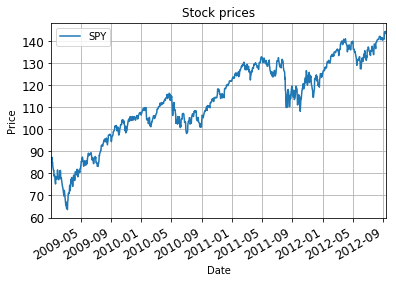

In [4]:
plot_data(df)

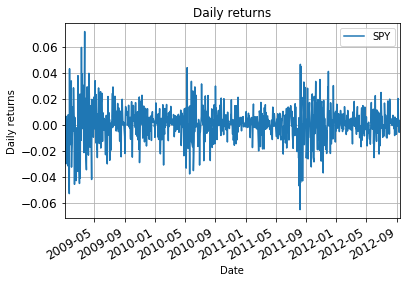

In [5]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

Mean: 0.0006355783322251791; std: 0.013370490899409844


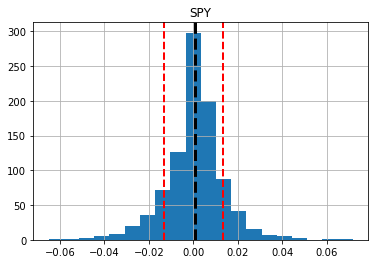

In [6]:
daily_returns.hist(bins=20)
# lets add mean & std on same plot
mean = daily_returns['SPY'].mean()
std = daily_returns['SPY'].std()
print(f"Mean: {mean}; std: {std}")
plt.axvline(mean, color='k', linestyle='--', linewidth=3)
plt.axvline(std, color='r', linestyle='--', linewidth=2)
plt.axvline(-std, color='r', linestyle='--', linewidth=2)
plt.show()

In [7]:
daily_returns.kurtosis() # a positive kurtosis, fat tails

SPY    3.220278
dtype: float64

# Comparing two histograms

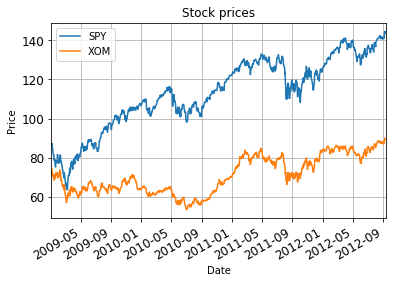

In [8]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
plot_data(df)

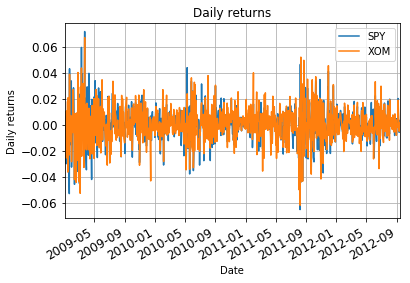

In [9]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4788b2fd0>,
      dtype=object)

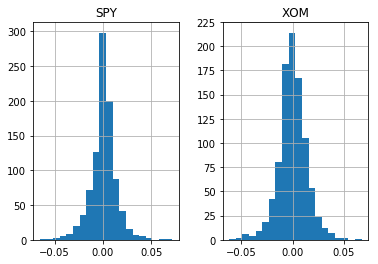

In [10]:
daily_returns.hist(bins=20)

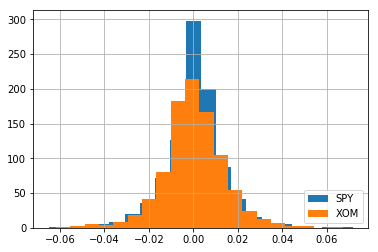

In [11]:
# lets plot them in the same plot
daily_returns['SPY'].hist(bins=20, label="SPY")
daily_returns['XOM'].hist(bins=20, label="XOM")
plt.legend(loc=4)


In [12]:
daily_returns.kurtosis()  
# SPY has thicker tail then XOM

SPY    3.220278
XOM    2.145326
dtype: float64

# Scatter plots

# Scatter plot, Alpha & Beta

- Beta: plot with SPY and if slope is the Beta; Beta = 1 means if SPY goes up by 1%, then stock goes up by 1% too
- Alpha: Where it intersects with vertical axis is called Alpha; Alpha is +ve means it is returning better then the market; Alpha is -ve means it is returning less then the market

## Scatterplot data with market or some other data and compare using Alpha & Beta

### Slope is != Correlation

- slope is slope
- correlation describes how tightly data fits the line!
- -1 < corr < 1

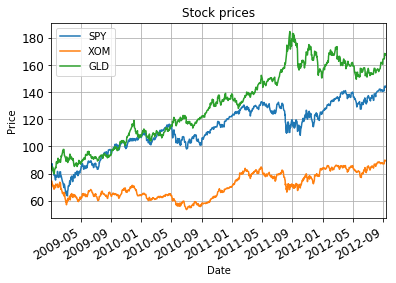

In [13]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GLD']
df = get_data(symbols, dates)
plot_data(df)

In [14]:
daily_returns = compute_daily_returns(df)

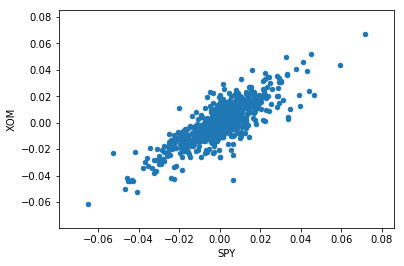

In [15]:
ax = daily_returns.plot(kind='scatter', x='SPY', y='XOM')

## In order fit line in a plot, can use numpy to compute a fitting line

- use np.polyfit to fit line of degree 1

XOM Beta: 0.8507462236725956; Alpha: -0.0002468672766800909


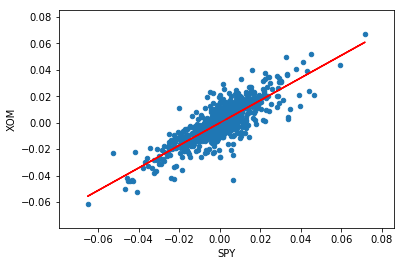

In [16]:
daily_returns.plot(kind='scatter', x='SPY', y='XOM')
# polynomial of degree 1: slope is beta & intercept is y-intercept
beta_XOM, alpha_xom = np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
# now draw this line
plt.plot(daily_returns['SPY'], beta_XOM * daily_returns['SPY'] + alpha_xom, '-', color='r')
print(f"XOM Beta: {beta_XOM}; Alpha: {alpha_xom}")

GLD Beta: 0.059761134832225046; Alpha: 0.0007478811161601735


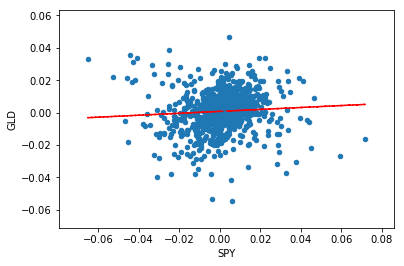

In [17]:
daily_returns.plot(kind='scatter', x='SPY', y='GLD')
beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
plt.plot(daily_returns['SPY'], beta_GLD * daily_returns['SPY'] + alpha_GLD, '--', color='r')
print(f"GLD Beta: {beta_GLD}; Alpha: {alpha_GLD}")

# Correlations - using pearson method

In [18]:
daily_returns.corr(method='pearson')

,SPY,XOM,GLD
SPY,1.000000,0.820241,0.067324
XOM,0.820241,1.000000,0.069687
GLD,0.067324,0.069687,1.000000
